# IMPORT LIBRARY

In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report


# Import Data

In [42]:
digits = load_digits()

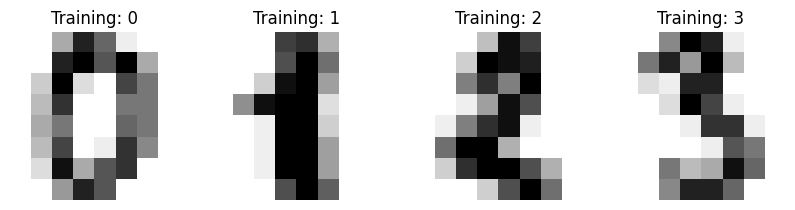

In [66]:
_,axes =plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ax.set_title('Training: %i' % label)


# Data preprocessing

## Flatten Image

In [44]:
digits.images.shape

(1797, 8, 8)

In [45]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [46]:
digits.images[0].shape

(8, 8)

In [47]:
len(digits.images)

1797

In [48]:
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1))

In [49]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [50]:
data[0].shape

(64,)

In [51]:
data.shape

(1797, 64)

# Scaling Image Data

In [52]:
data.min()

0.0

In [53]:
data.max()

16.0

In [54]:
data=data/16

In [55]:
data.min()

0.0

In [56]:
data.max()

1.0

In [57]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train Test Split Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# RF Model

In [60]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

# Predict Test Data

In [61]:
y_pred=rf.predict(X_test)

In [62]:
y_pred

array([2, 1, 8, 2, 3, 6, 8, 8, 2, 2, 8, 6, 4, 1, 9, 6, 0, 7, 7, 8, 7, 8,
       2, 2, 6, 6, 0, 2, 9, 1, 8, 3, 9, 7, 0, 4, 4, 3, 5, 3, 1, 6, 6, 9,
       3, 6, 3, 9, 2, 4, 9, 5, 3, 4, 0, 2, 1, 2, 5, 6, 6, 5, 1, 6, 3, 1,
       7, 4, 4, 8, 0, 4, 5, 3, 7, 8, 1, 4, 5, 6, 0, 8, 3, 7, 9, 9, 0, 4,
       3, 8, 5, 3, 3, 7, 6, 4, 1, 8, 6, 6, 1, 3, 9, 1, 8, 8, 4, 4, 3, 0,
       7, 3, 9, 9, 5, 5, 8, 9, 5, 5, 0, 5, 7, 6, 5, 1, 8, 8, 0, 7, 6, 0,
       5, 8, 6, 9, 2, 9, 9, 4, 5, 0, 1, 1, 7, 2, 3, 4, 6, 6, 4, 6, 3, 5,
       1, 4, 4, 8, 9, 5, 9, 6, 1, 6, 2, 2, 5, 6, 8, 7, 4, 6, 5, 3, 7, 1,
       9, 3, 9, 8, 7, 4, 3, 5, 0, 1, 4, 5, 4, 3, 7, 0, 7, 4, 2, 8, 8, 6,
       6, 2, 7, 8, 3, 6, 0, 8, 8, 3, 6, 0, 4, 7, 6, 6, 6, 1, 9, 6, 1, 3,
       9, 6, 1, 6, 7, 5, 8, 8, 2, 9, 8, 2, 0, 8, 9, 6, 4, 3, 8, 8, 7, 7,
       4, 9, 9, 3, 1, 5, 5, 5, 2, 2, 2, 3, 4, 0, 1, 1, 7, 3, 4, 2, 9, 3,
       7, 0, 2, 1, 6, 0, 0, 3, 6, 6, 6, 0, 1, 1, 1, 8, 5, 4, 4, 7, 6, 8,
       2, 2, 4, 3, 2, 2, 3, 0, 2, 6, 9, 7, 0, 3, 9,

# Model Accuracy

In [63]:
confusion_matrix(y_test,y_pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 60,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  1,  0, 43,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  1,  1],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 50]])

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      0.98      0.98        54
           2       0.98      1.00      0.99        53
           3       0.98      0.97      0.98        62
           4       1.00      0.97      0.98        60
           5       0.96      0.93      0.95        46
           6       0.98      1.00      0.99        61
           7       1.00      0.96      0.98        50
           8       0.93      0.96      0.95        54
           9       0.93      0.96      0.94        52

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



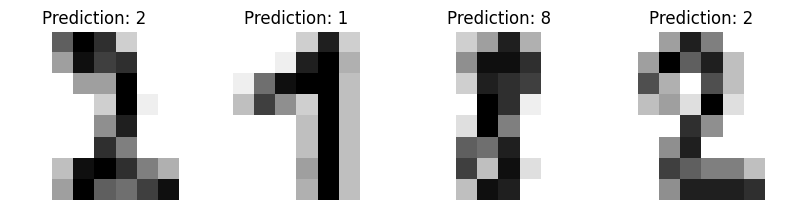

In [68]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
plt.show()